In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the data
ad_data = pd.read_csv('advertising.csv')

In [7]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [10]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [13]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


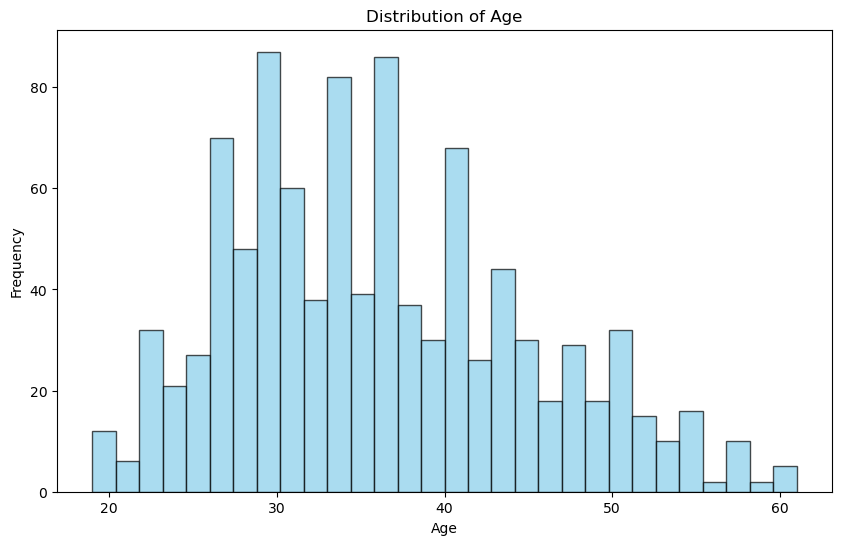

In [16]:
# 2.1 Histogram for Age
plt.figure(figsize=(10, 6))
ad_data['Age'].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(False)
plt.show()

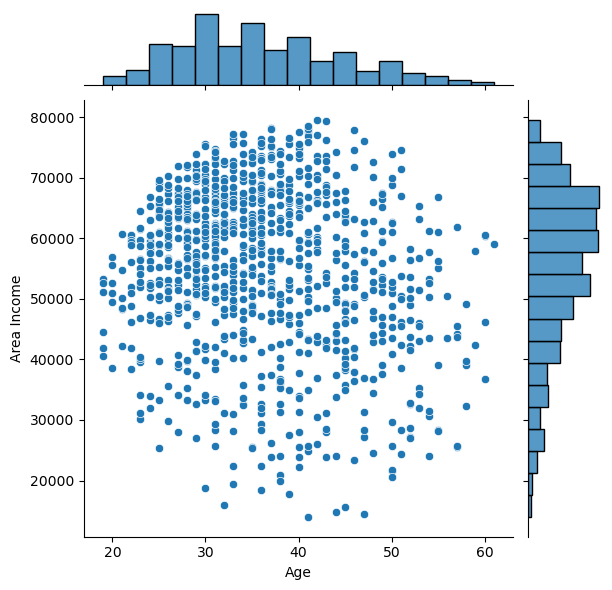

In [19]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)
plt.show()

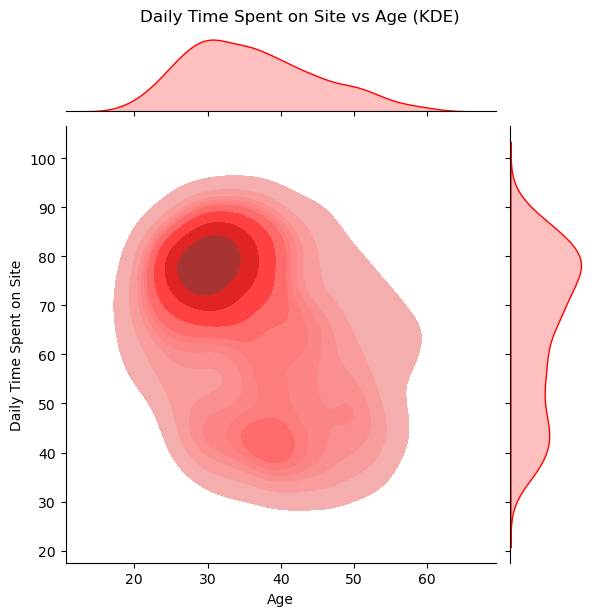

In [22]:
# 2.3 Jointplot: Daily Time spent on site vs Age (KDE)

sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', 
              color='red', fill=True)
plt.suptitle('Daily Time Spent on Site vs Age (KDE)', y=1.02)
plt.show()

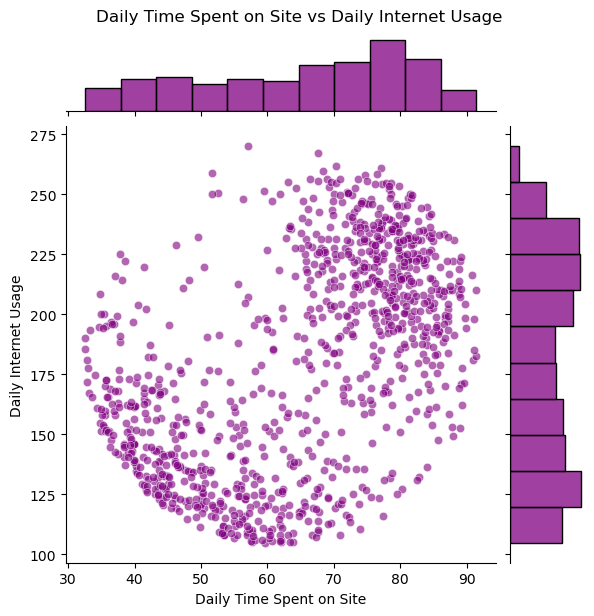

In [25]:
# 2.4 Jointplot: Daily Time Spent on Site vs Daily Internet Usage

sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, 
              kind='scatter', color='purple', alpha=0.6)
plt.suptitle('Daily Time Spent on Site vs Daily Internet Usage', y=1.02)
plt.show()

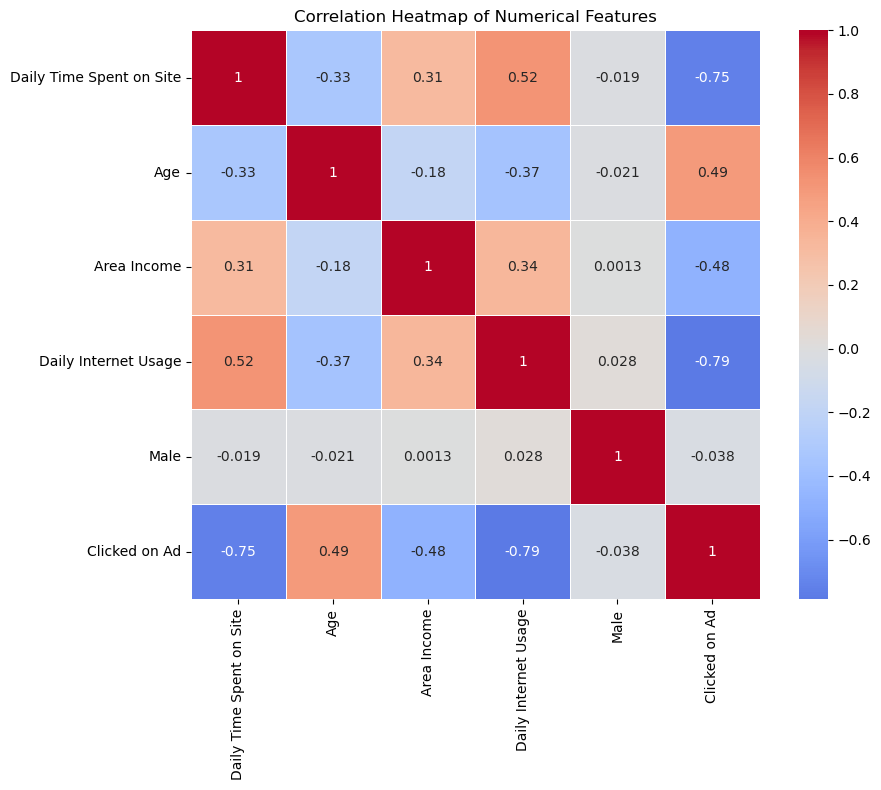

In [31]:
# 2.5 Correlation heatmap (Numerical Features)

numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 
                     'Daily Internet Usage', 'Male', 'Clicked on Ad']
plt.figure(figsize=(10, 8)) 
correlation_matrix = ad_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

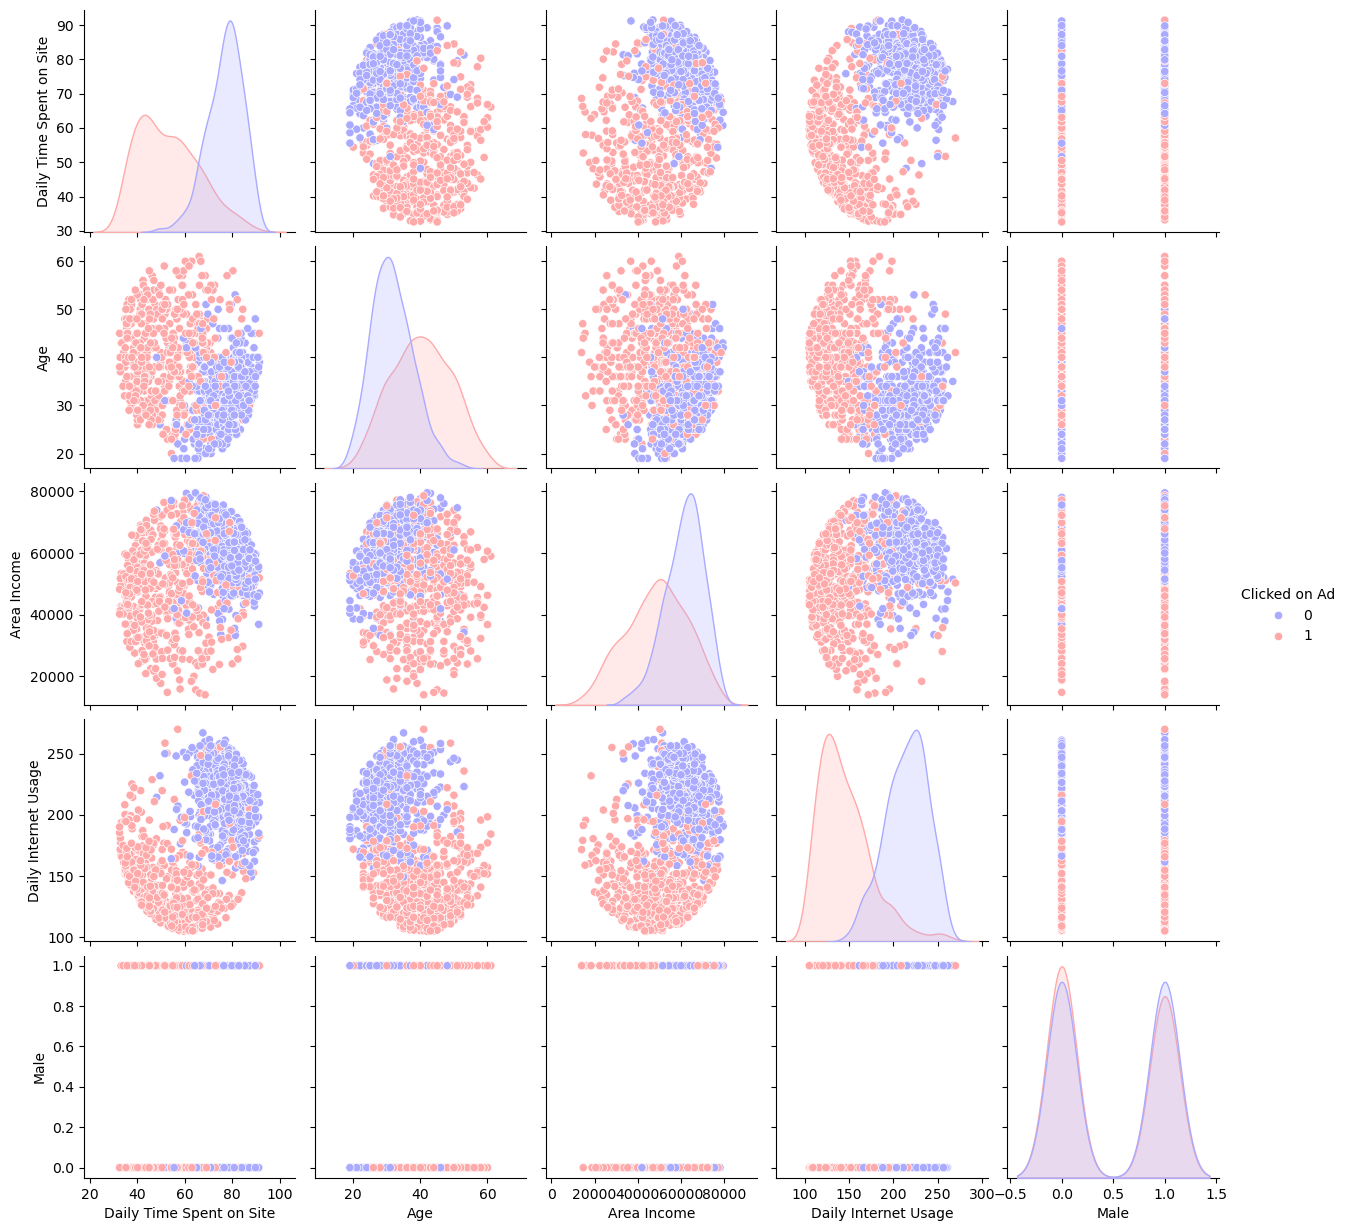

In [34]:
# Pairplot with hue based on 'Clicked on Ad'
sns.pairplot(ad_data, hue='Clicked on Ad', palette='bwr')
plt.show()

In [37]:
# Check for missing values
print("Missing values:")
print(ad_data.isnull().sum())


# Feature engineering from timestamp
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])
ad_data['Hour'] = ad_data['Timestamp'].dt.hour
ad_data['DayOfWeek'] = ad_data['Timestamp'].dt.dayofweek
ad_data['Month'] = ad_data['Timestamp'].dt.month

# Prepare features - drop high cardinality categorical columns
ad_data_clean = ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)

print(f"Cleaned dataset shape: {ad_data_clean.shape}")

# Separate features and target
X = ad_data_clean.drop('Clicked on Ad', axis=1)
y = ad_data_clean['Clicked on Ad']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Missing values:
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64
Cleaned dataset shape: (1000, 9)
Training set: (700, 8)
Test set: (300, 8)


In [40]:
# 4.1 Logistic Regression with Hyperparameter Tuning
print("1. Training Logistic Regression...")
log_reg = LogisticRegression(random_state=42)

# Define parameter grid for Logistic Regression
log_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Perform GridSearchCV
log_grid = GridSearchCV(log_reg, log_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
log_grid.fit(X_train_scaled, y_train)

print(f"   Best Logistic Regression parameters: {log_grid.best_params_}")
print(f"   Best CV score: {log_grid.best_score_:.4f}")

# Get best model
best_log_reg = log_grid.best_estimator_

# 4.2 Random Forest Classifier with Hyperparameter Tuning
print("2. Training Random Forest...")
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"   Best Random Forest parameters: {rf_grid.best_params_}")
print(f"   Best CV score: {rf_grid.best_score_:.4f}")

# Get best model
best_rf = rf_grid.best_estimator_

1. Training Logistic Regression...
   Best Logistic Regression parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
   Best CV score: 0.9893
2. Training Random Forest...
   Best Random Forest parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
   Best CV score: 0.9912


In [49]:
# Perform cross-validation

# Logistic Regression CV
log_cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Logistic Regression CV AUC: {log_cv_scores.mean():.4f}")

# Random Forest CV
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Random Forest CV AUC: {rf_cv_scores.mean():.4f}")


Logistic Regression CV AUC: 0.9892
Random Forest CV AUC: 0.9906


In [58]:
# Make predictions
log_pred = best_log_reg.predict(X_test_scaled)
log_pred_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]

rf_pred = best_rf.predict(X_test)
rf_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# 5.1 Logistic Regression Accuracy, AUC Score
print("1. Model Performance Metrics:")
print("   Logistic Regression:")
print(f"   - Accuracy: {accuracy_score(y_test, log_pred):.4f}")
print(f"   - AUC Score: {roc_auc_score(y_test, log_pred_proba):.4f}")

# Logistic Regression Classification Report
print(" Logistic Regression Classification Report:")
print("   " + classification_report(y_test, log_pred).replace("\n", "\n   "))


# Random Forest Performance: Accuracy, AUC Score
print("2. Model Performance Metrics:")
print("   Logistic Regression:")
print(f"   - Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"   - AUC Score: {roc_auc_score(y_test, rf_pred_proba):.4f}")

# 5.3 Random Forest Classification Report
print(" Random Forest Classification Report:")
print("   " + classification_report(y_test, rf_pred).replace("\n", "\n   "))

1. Model Performance Metrics:
   Logistic Regression:
   - Accuracy: 0.9767
   - AUC Score: 0.9925
 Logistic Regression Classification Report:
                 precision    recall  f1-score   support
   
              0       0.97      0.98      0.98       150
              1       0.98      0.97      0.98       150
   
       accuracy                           0.98       300
      macro avg       0.98      0.98      0.98       300
   weighted avg       0.98      0.98      0.98       300
   
2. Model Performance Metrics:
   Logistic Regression:
   - Accuracy: 0.9667
   - AUC Score: 0.9927
 Random Forest Classification Report:
                 precision    recall  f1-score   support
   
              0       0.97      0.97      0.97       150
              1       0.97      0.97      0.97       150
   
       accuracy                           0.97       300
      macro avg       0.97      0.97      0.97       300
   weighted avg       0.97      0.97      0.97       300
   


<Figure size 700x600 with 0 Axes>

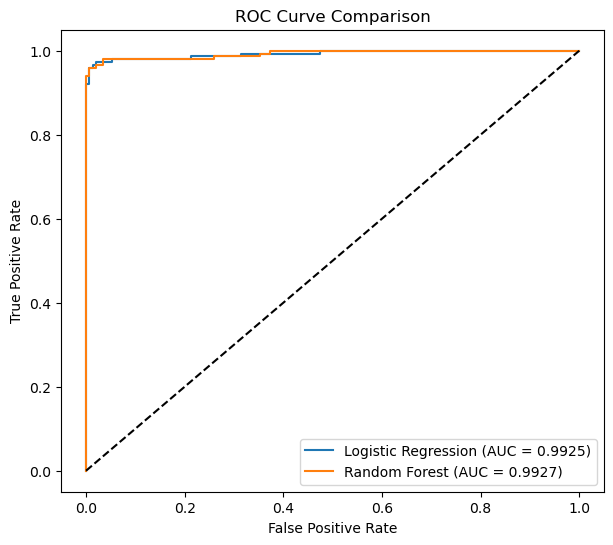

In [74]:
# 6.1 ROC Curves Comparison
# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_pred_proba)
log_auc = roc_auc_score(y_test, log_pred_proba)
precision_log, recall_log, _ = precision_recall_curve(y_test, log_pred_proba)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
rf_auc = roc_auc_score(y_test, rf_pred_proba)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_pred_proba)

# Plot ROC for both models
plt.figure(figsize=(7, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {log_auc:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

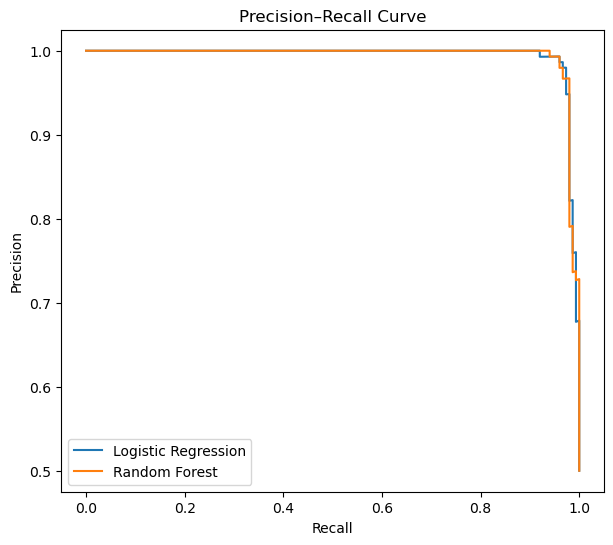

In [76]:
plt.figure(figsize=(7, 6))
plt.plot(recall_log, precision_log, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.title('Precision–Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

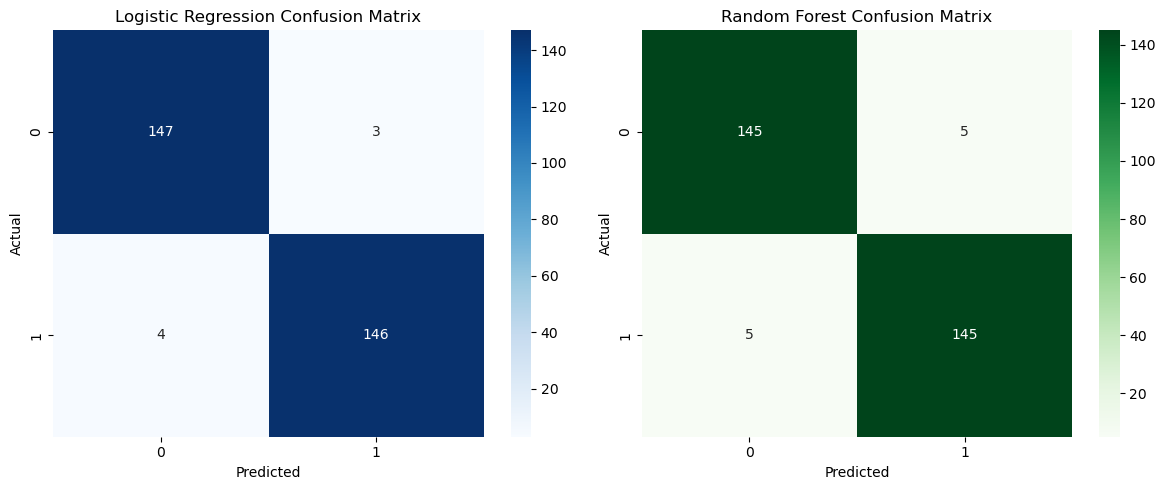

In [84]:
# Plot them
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

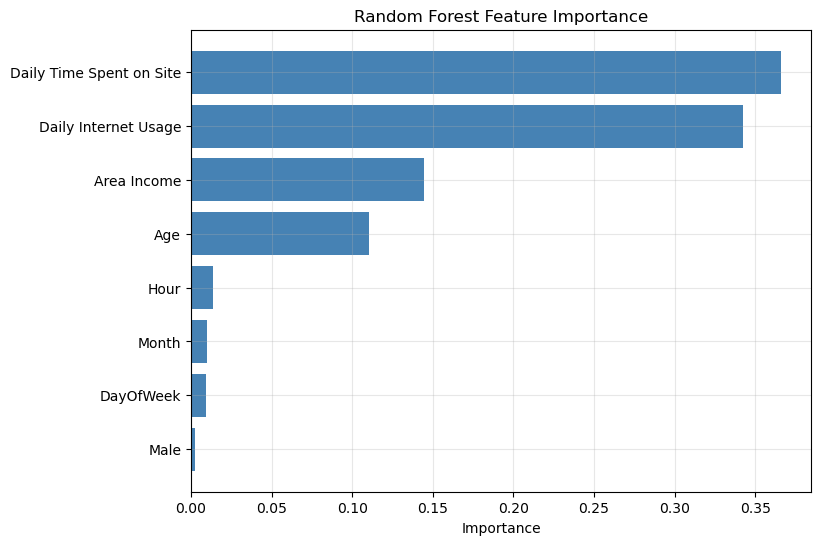

In [102]:
# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.grid(True, alpha=0.3)
plt.show()

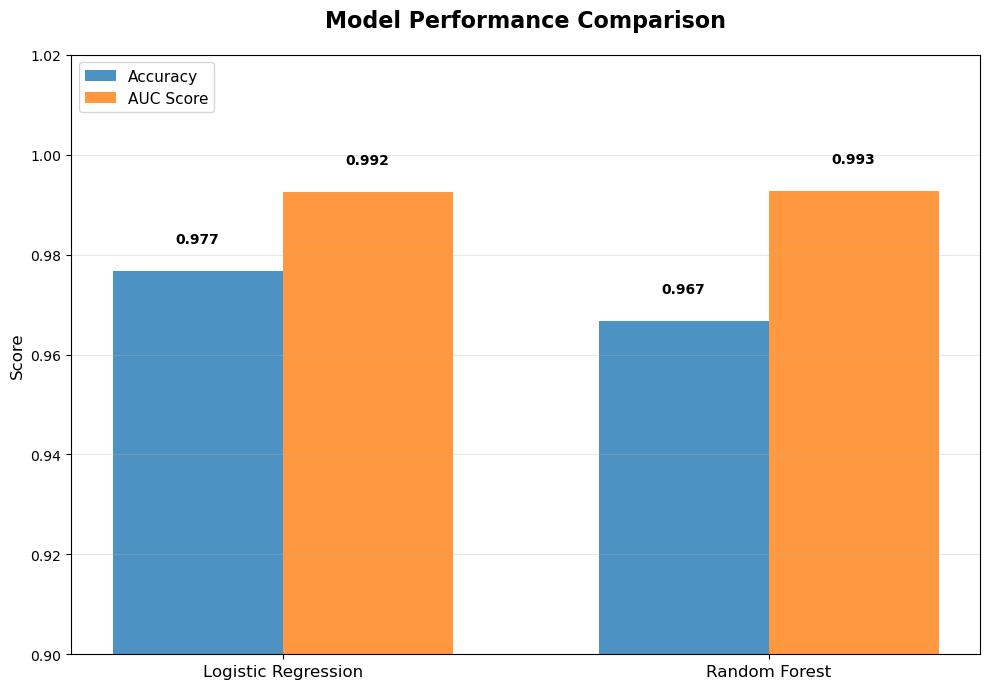

In [124]:
# create the comparison plot
models = ['Logistic Regression', 'Random Forest']
accuracy = [log_accuracy, rf_accuracy]
auc = [log_auc, rf_auc]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 7))
bars1 = plt.bar(x - width/2, accuracy, width, label='Accuracy', color='#1f77b4', alpha=0.8)
bars2 = plt.bar(x + width/2, auc, width, label='AUC Score', color='#ff7f0e', alpha=0.8)

# Add value labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.xticks(x, models, fontsize=12)
plt.ylim(0.9, 1.02)  # Adjusted to make room for labels
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Score', fontsize=12)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

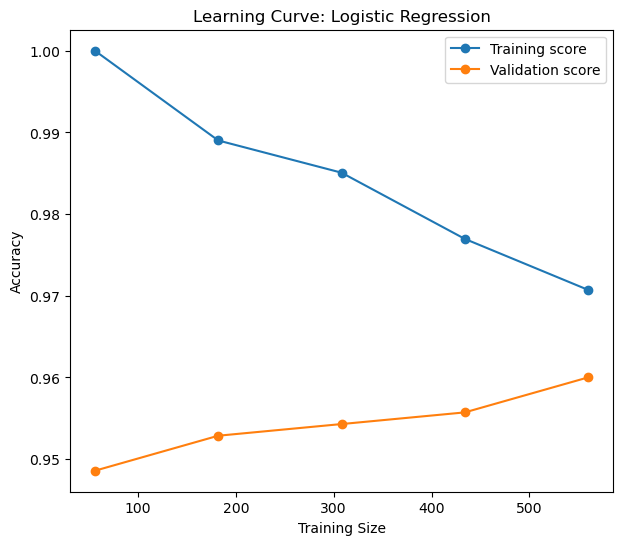

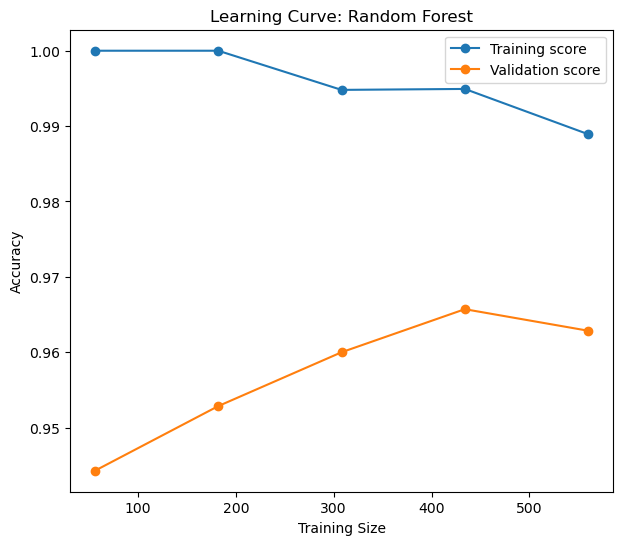

In [128]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy')
    plt.figure(figsize=(7, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Validation score')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_learning_curve(log_reg, X_train_scaled, y_train, 'Learning Curve: Logistic Regression')
plot_learning_curve(best_rf, X_train, y_train, 'Learning Curve: Random Forest')  # Fixed: rf_model → best_rf